# Supervised methods in machine learning

### Overview

In this exercise, you will train two models, one using a decision tree and one using random forest, to predict log koff values for inhibitors of p38 MAP kinase.

The file data1.csv contains information for 33 small molecules which are inhibitors of p38 MAP kinase.

The file contains the following information:

    column 1: log of dissociation rate constants (log koff, in log s-1)
    column 2: molecular weight (MWT)
    column 3: topological polar surface area (TPSA)
    column 4: log of octanol-water partition coefficient (logP)
    column 5: number of hydrogen bond acceptors (HBA)
    column 6: number of hydrogen bond donors (HBD)
    column 7: number of heavy atoms
    column 8: number of aromatic rings

The values for columns 2-8 were obtained using the python library RDkit. 

### a) Read koff values and features from file data1.csv.

In [50]:
import pandas as pd
from pandas import *
from numpy import *
import numpy as np
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.optimize import curve_fit
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn.tree import *
from sklearn.metrics import *

features = pd.read_csv('data/data1.csv', ';', usecols=['koff','MWT','TPSA','logP','HBA','HBD','atoms','rings'])
features.head(72)
print("Data set")
print(features)

Data set
     koff      MWT    TPSA     logP  HBA  HBD  atoms  rings
0  -0.854  306.797   58.95  4.01500    3    2     21      2
1  -5.081  527.669   80.65  5.98642    6    2     39      5
2  -0.854  272.352   72.94  2.96882    3    2     20      2
3  -4.824  513.642   80.65  5.67800    6    2     38      5
4  -3.420  499.615   80.65  5.50390    6    2     37      5
5  -3.398  543.668  100.88  4.95882    7    3     40      5
6  -2.481  451.571   80.65  4.22580    6    2     33      4
7  -4.638  528.657   93.54  5.38142    7    2     39      5
8  -4.420  570.738   83.89  6.05242    7    2     42      5
9  -4.585  556.711   83.89  5.74400    7    2     41      5
10 -2.796  348.450   58.95  5.12222    3    2     26      3
11 -3.921  398.510   58.95  6.27542    3    2     30      4
12 -4.638  525.697   71.42  6.54022    5    2     39      5
13 -2.409  477.609   80.65  4.83322    6    2     35      4
14 -3.469  428.536   68.18  6.28402    4    2     32      4
15 -3.824  541.696   80.65  6.2

/home/ariane/anaconda3/envs/md/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


### b) Determine which values we want to predict (the labels, in our case koff values), and split the dataset into training and test set (20% of the data).

In [51]:
labels = np.array(features['koff'])
features= features.drop('koff', axis = 1)
feature_list = list(features.columns) 
features = np.array(features)

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 7)


### c) Build a model to predict koff using the features and one decision tree. Use the model to make predictions for the test set.

In [40]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_features = 'log2', random_state = 7)
dt.fit(train_features, train_labels)
predictions_test_dt = dt.predict(test_features)
predictions_train_dt = dt.predict(train_features)

### d) Compute the coefficient of determination (R2) for the training and test set, and plot the results for the model using one decision tree. 

The closest the value of R2 is to 1.0, the more similar are the experimental and predicted koff values. 

Decision trees usually show overfitting to the training set, showing a high R2 value for the training set, and a low R2 values for the test set. 

R2 training set (green): 0.995
R2 test set (red): 0.061


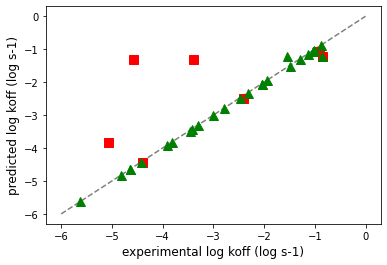

In [45]:
from sklearn.metrics import *
R2_train = r2_score(train_labels, predictions_train_dt)
print('R2 training set (green):',round(R2_train,3))
R2_test = r2_score(test_labels, predictions_test_dt)
print('R2 test set (red):',round(R2_test,3))

plt.plot([-6, 0], [-6, 0], linestyle = '--', color = 'grey')
plt.plot(test_labels, predictions_test_dt, 's',markersize = 9, label='test set', color = 'red')
plt.plot(train_labels, predictions_train_dt, '^',markersize = 9, label='training set', color ='green')
plt.xlabel('experimental log koff (log s-1)', fontsize = 12)
plt.ylabel('predicted log koff (log s-1)', fontsize = 12)
plt.show()


### e) Build a model to predict koff using the features and random forest, an ensemble / group of many decision trees. Use the model to make predictions for the test set.

In [42]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, max_features = 'log2', random_state = 7)
rf.fit(train_features, train_labels)
predictions_test = rf.predict(test_features)
predictions_train = rf.predict(train_features)

### f) Compute the R2 for the training and test set, and plot the results for the model using random forest. 

This model is expected to have a higher R2 value for the test set than the model using decision trees, because the use of a group of decision trees avoids overfitting of the model.

R2 training set (green): 0.881
R2 test set (red): 0.654


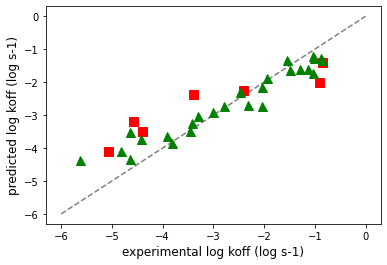

In [44]:
R2_train = r2_score(train_labels, predictions_train)
print('R2 training set (green):',round(R2_train,3))
R2_test = r2_score(test_labels, predictions_test)
print('R2 test set (red):',round(R2_test,3))

plt.plot([-6, 0], [-6, 0], linestyle = '--', color = 'grey')
plt.plot(test_labels, predictions_test, 's',markersize = 9, label='test set', color = 'red')
plt.plot(train_labels, predictions_train, '^',markersize = 9, label='training set', color ='green')
plt.xlabel('experimental log koff (log s-1)', fontsize = 12)
plt.ylabel('predicted log koff (log s-1)', fontsize = 12)
plt.show()


### Exercise

Using the steps above, train two models, one using a decision tree and one using random forest, to predict log koff values for inhibitors of heat shock protein 90. The data provided in the file data2.csv.

The file data2.csv contains information for 77 small molecules which are inhibitors of heat shock protein 90 (HSP90). The file data2.csv contains the following information:

    column 1: log of dissociation rate constants (log koff, in log s-1)
    column 2: molecular weight (MWT)
    column 3: number of hydrogen bond acceptors (HBA)
    column 4: number of hydrogen bond donors (HBD)
    column 5: topological polar surface area (TPSA)
    column 6: log of octanol-water partition coefficient (logP)
    column 7: molar refractivity
    column 8: number of rotatable bonds
